# **Libraries Required**


In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Preprocessing**

## Load DataSet

In [2]:
df = pd.read_csv('potability.csv')

## Understanding the Dataset

In [3]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.442537,180.859091,18223.027080,8.577250,405.320016,564.793485,14.768337,57.757554,2.191139,1
1,6.789821,197.300015,22527.681207,5.166942,399.981755,422.482029,15.916605,47.935105,4.512068,1
2,6.804796,223.995701,17196.054711,7.112622,374.309131,344.718314,15.457383,60.151346,4.847313,1
3,3.989032,216.076138,40175.206092,7.487423,309.800796,399.047181,11.186739,86.957464,4.409414,0
4,8.075495,195.804996,29483.601854,10.493841,298.737219,321.748339,9.751086,72.734423,3.682920,1


In [4]:
df.shape

(8580, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,8198.000000,8580.000000,8580.000000,8580.000000,7968.000000,8580.000000,8580.000000,8461.000000,8580.000000,8580.000000
mean,7.073202,196.302072,22033.735429,7.142627,333.699122,426.121008,14.240330,66.343424,3.964486,0.500000
std,1.493194,33.058931,8720.038554,1.600986,39.279347,80.920116,3.326204,15.988119,0.781744,0.500029
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.199818,176.640064,15704.482093,6.123298,313.344198,365.094144,12.022616,56.044935,3.439022,0.000000
50%,7.080795,197.102725,20982.439792,7.150471,333.775777,421.464253,14.162809,66.396293,3.955847,0.500000
75%,7.894197,216.628561,27402.019999,8.124403,355.087258,482.487877,16.520858,77.157802,4.502020,1.000000
max,14.000000,323.124000,56488.672413,13.127000,481.030643,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               8198 non-null   float64
 1   Hardness         8580 non-null   float64
 2   Solids           8580 non-null   float64
 3   Chloramines      8580 non-null   float64
 4   Sulfate          7968 non-null   float64
 5   Conductivity     8580 non-null   float64
 6   Organic_carbon   8580 non-null   float64
 7   Trihalomethanes  8461 non-null   float64
 8   Turbidity        8580 non-null   float64
 9   Potability       8580 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 670.4 KB


# **Exploratory Data Analysis (EDA)**

## Missing Values

In [7]:
print(df.isnull().sum().sum())
print('---------------')
print(df.isnull().sum())

1113
---------------
ph                 382
Hardness             0
Solids               0
Chloramines          0
Sulfate            612
Conductivity         0
Organic_carbon       0
Trihalomethanes    119
Turbidity            0
Potability           0
dtype: int64


### Fill Missing Values Using IQR

In [8]:
for column in df.columns:
    if df[column].isnull().sum() > 0:  # only for columns with missing values
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        median = df[column].median()
        
        df[column].fillna(median, inplace=True)


C:\Users\tahou\AppData\Local\Temp\ipykernel_22356\3296165724.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median, inplace=True)
C:\Users\tahou\AppData\Local\Temp\ipykernel_22356\3296165724.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

## Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## Analysis

In [10]:
# checking the unique values of label
df['Potability'].unique()

array([1, 0])


🎯 TARGET VARIABLE ANALYSIS


C:\Users\tahou\AppData\Local\Temp\ipykernel_22356\251546373.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Potability', palette=['lightcoral', 'lightgreen'])


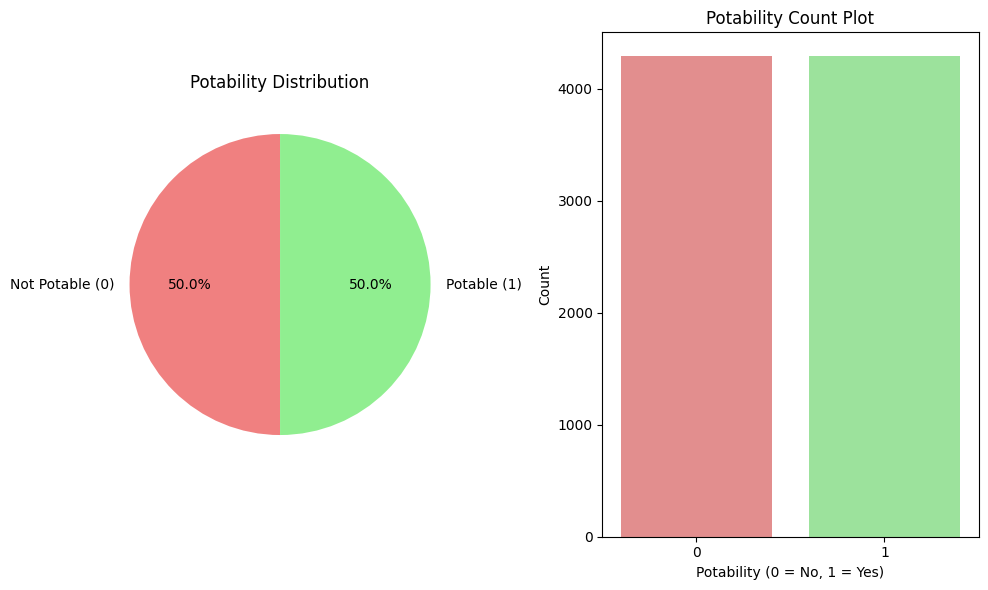

Class Distribution:
Potability
1    4290
0    4290
Name: count, dtype: int64

Class Balance Ratio: 1.00:1


In [11]:
print("\n🎯 TARGET VARIABLE ANALYSIS")
print("=" * 50)

# Count plot of target variable
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
target_counts = df['Potability'].value_counts()
colors = ['lightcoral', 'lightgreen']
plt.pie(target_counts.values, labels=['Not Potable (0)', 'Potable (1)'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Potability Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Potability', palette=['lightcoral', 'lightgreen'])
plt.title('Potability Count Plot')
plt.xlabel('Potability (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Class balance statistics
print("Class Distribution:")
print(target_counts)
print(f"\nClass Balance Ratio: {target_counts[0]/target_counts[1]:.2f}:1")

### UNIVARIATE ANALYSIS


📊 UNIVARIATE ANALYSIS


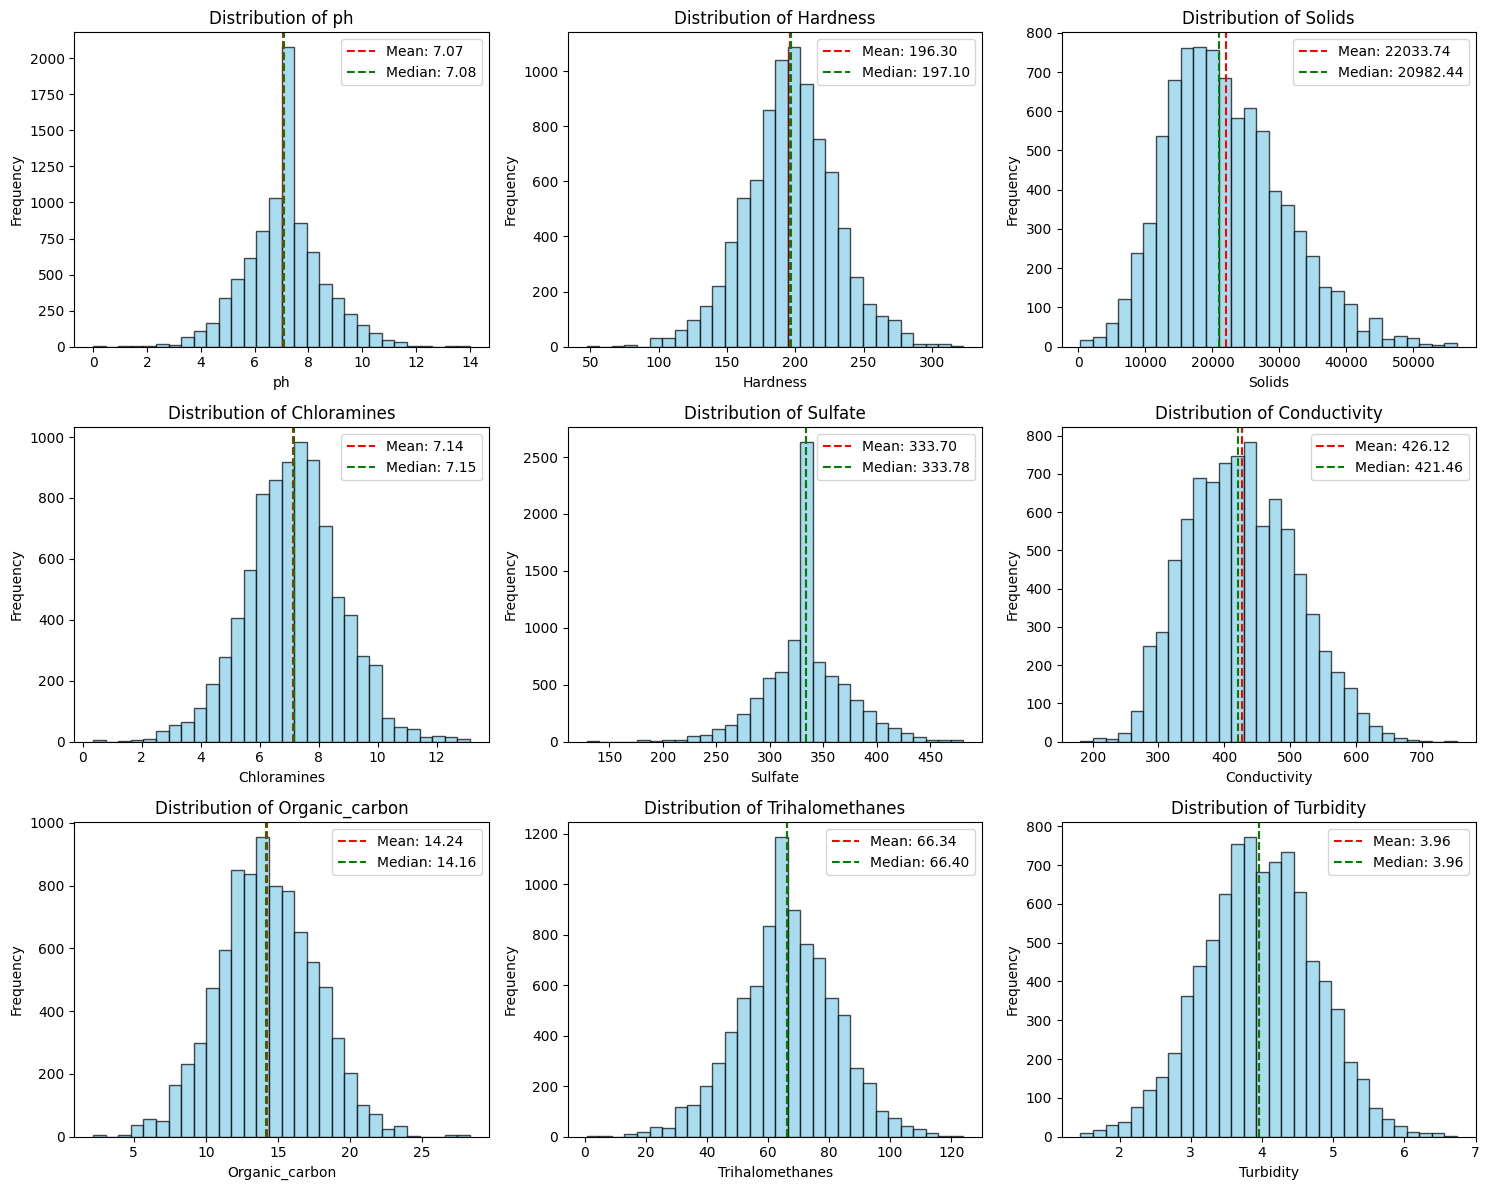

In [12]:
print("\n📊 UNIVARIATE ANALYSIS")
print("=" * 50)

# Create subplots for histograms and boxplots
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
           'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    # Histogram with KDE
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Boxplot to visualize outliers

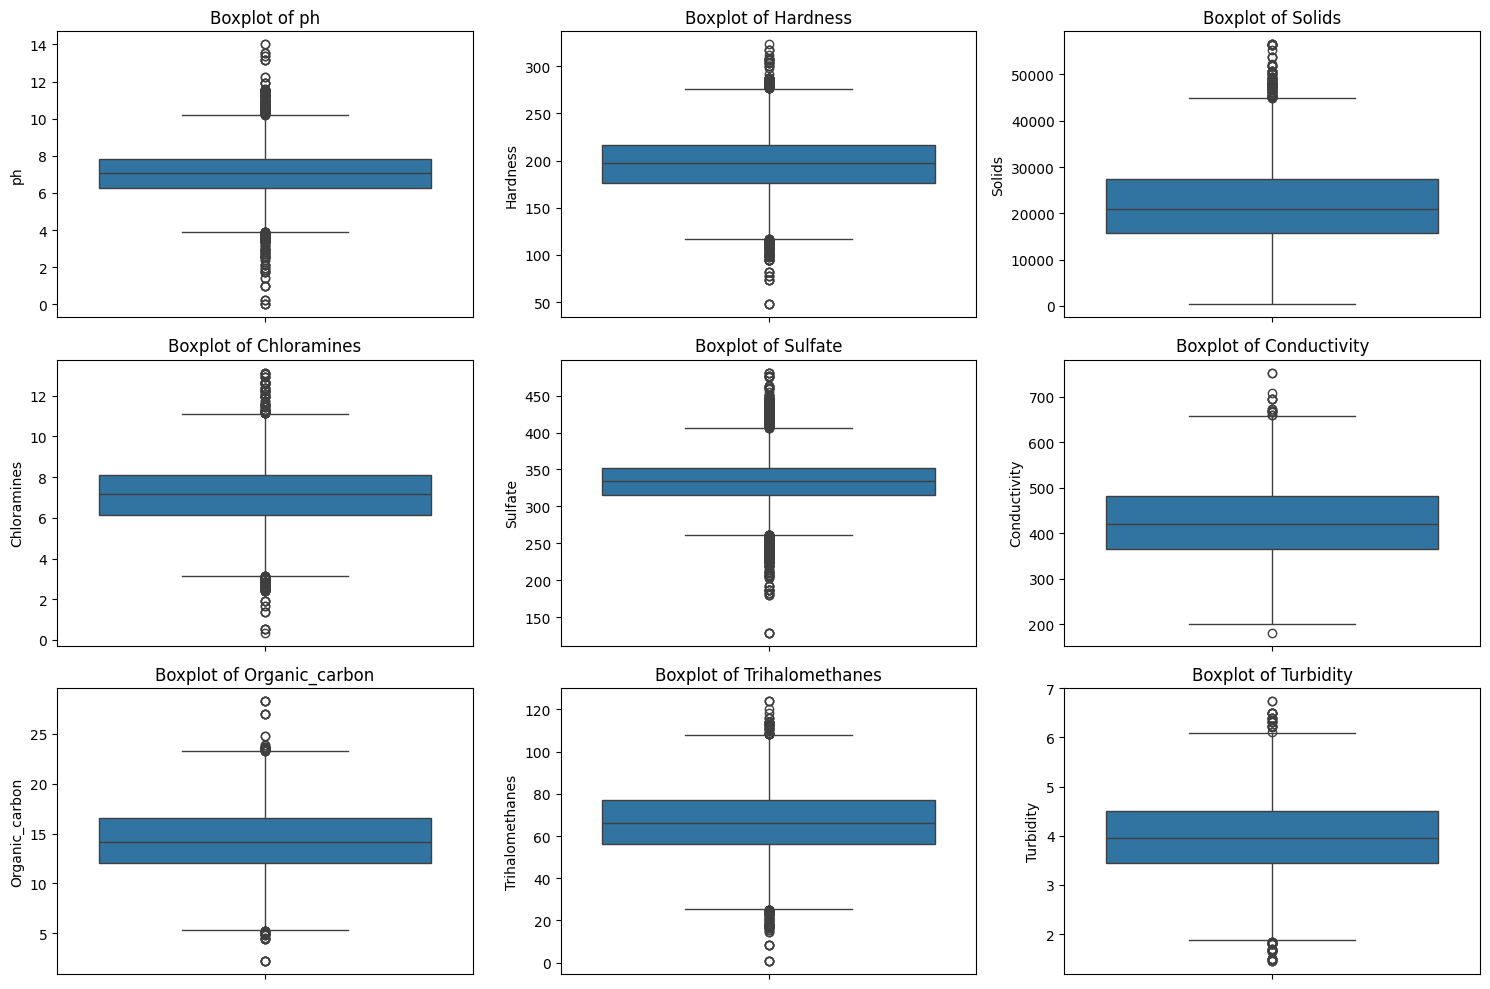

In [13]:
features = ['ph','Hardness', 'Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Heatmap Corr

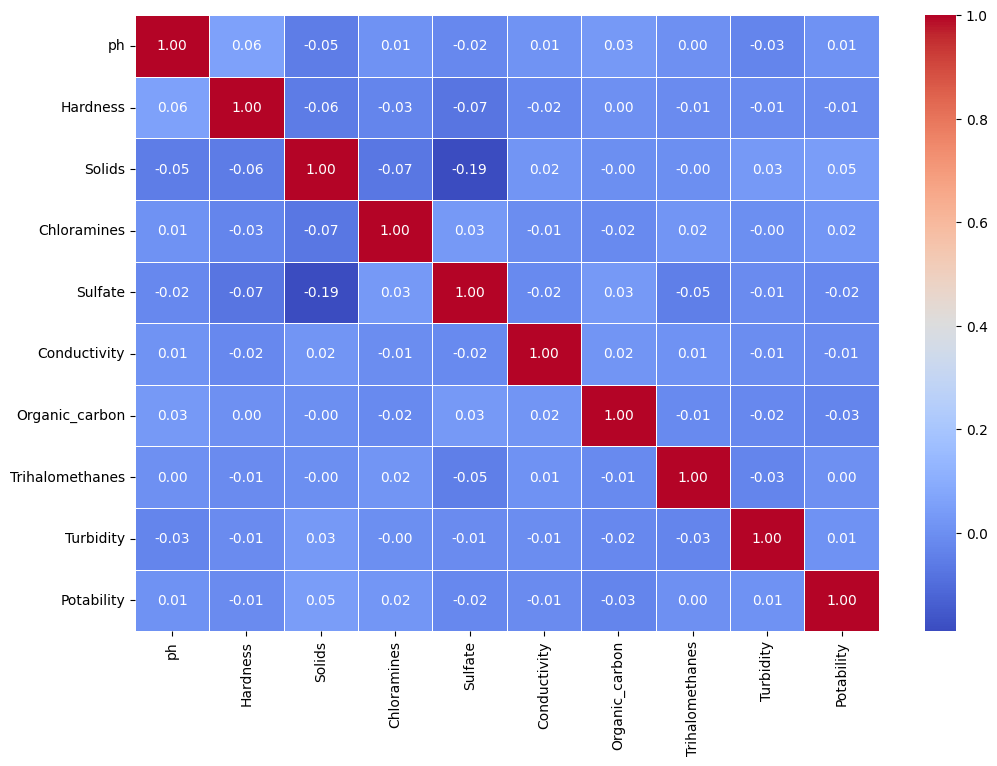

In [14]:
corr = df.corr()

# Set figure size (width, height)
plt.figure(figsize=(12, 8))  # You can increase these numbers if needed

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show it
plt.show()

## feature Engineering

In [15]:
df['Solids_Conductivity'] = df['Solids'] * df['Conductivity']
df['Chloramines_THMs'] = df['Chloramines'] * df['Trihalomethanes']
df['Hardness_Sulfate'] = df['Hardness'] * df['Sulfate']
df['Turbidity_Organic'] = df['Turbidity'] * df['Organic_carbon']

# **Model Building**

## Split Data

In [16]:
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Model

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest (Baseline) Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Training Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Random Forest (Baseline) Accuracy: 0.9702797202797203
Training Accuracy: 1.0
Test Accuracy: 0.9702797202797203


### Hyperparameter Tuning with Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.9696969696969697


### Comparision between The Two models

In [19]:
print("\nModel Comparison:")
print("Random Forest (Baseline):", accuracy_score(y_test, y_pred_rf))
print("Random Forest (Tuned):", accuracy_score(y_test, y_pred_best))


Model Comparison:
Random Forest (Baseline): 0.9702797202797203
Random Forest (Tuned): 0.9696969696969697


## Cross Validation

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ===== Handle missing values with median (Q2) =====
for column in df.columns:
    if df[column].isnull().sum() > 0:
        median = df[column].median()
        df[column].fillna(median, inplace=True)

# ===== Split data =====
X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Scale features =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== Random Forest =====
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# ===== Cross-Validation =====
print("\nCross-validation results (5-fold):")
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Mean Accuracy: {cv_scores_rf.mean():.4f}")


Random Forest Accuracy: 0.9702797202797203

Cross-validation results (5-fold):
Random Forest CV Mean Accuracy: 0.9395


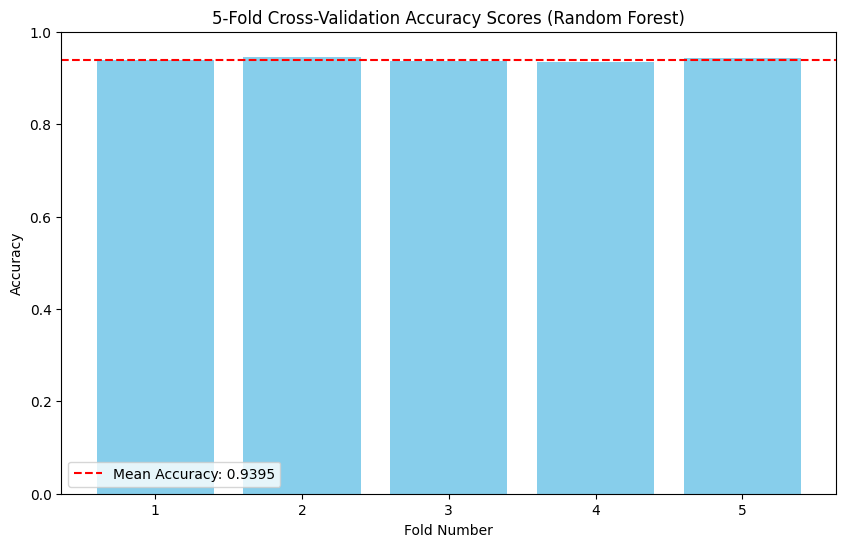

In [21]:
import matplotlib.pyplot as plt

scores = cv_scores_rf  # or cv_scores_lr

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scores) + 1), scores, color='skyblue')
plt.axhline(scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {scores.mean():.4f}')
plt.title('5-Fold Cross-Validation Accuracy Scores (Random Forest)')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # You had (0.98, 1.0), but that’s too narrow unless your accuracy is near 100%
plt.legend()
plt.show()
